In [1]:
!pip install -q fastplot

In [2]:
import pandas as pd
import fastplot
%matplotlib inline

In [3]:
with open('datasets/cve_info.csv', 'r') as f:
    df_cve_nvd = pd.read_csv(f)
df_cve_nvd['published'] = pd.to_datetime(df_cve_nvd['published'])
df_cve_first = pd.read_pickle('datasets/dataset.pkl')
cve_nvd = set(df_cve_nvd['id'].unique())
cve_first = set(df_cve_first['cve'].unique())

# Cardinality of NVD and FIRST dataset

In [18]:
print(f"#CVEs from NVD  \t {len(cve_nvd)}")
print(f"#CVEs from FIRST\t {len(cve_first)}")

#CVEs from NVD  	 241103
#CVEs from FIRST	 239192


# Missing CVEs analysis

In [20]:
missing_first = cve_nvd - cve_first
missing_nvd = cve_first - cve_nvd
print(f"Missing CVEs from FIRST dataset wrt NVD \t {len(missing_first)}")
print(f"Missing CVEs from NVD dataset wrt FIRST \t {len(missing_nvd)}")

Missing CVEs from FIRST dataset wrt NVD 	 1960
Missing CVEs from NVD dataset wrt FIRST 	 49


## Status of CVEs missing from FIRST dataset

In [17]:
vuln_status = list(df_cve_nvd['vulnStatus'].unique())
df_first_missing = df_cve_nvd[df_cve_nvd['id'].isin(missing_first)]
vuln_first_count = df_first_missing['vulnStatus'].value_counts()
for status in sorted(vuln_status):
    if status in vuln_first_count.keys():
        print(f"{status.ljust(10)} {str(vuln_first_count[status]).rjust(10)}")
print(f"\nMissing 'analyzed': {df_first_missing[df_first_missing['vulnStatus'] == 'Analyzed']['id'].values}")

Analyzed            1
Received          140
Rejected         1819

Missing 'analyzed': ['CVE-2005-2759']


## Distribution of publication year

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.9/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

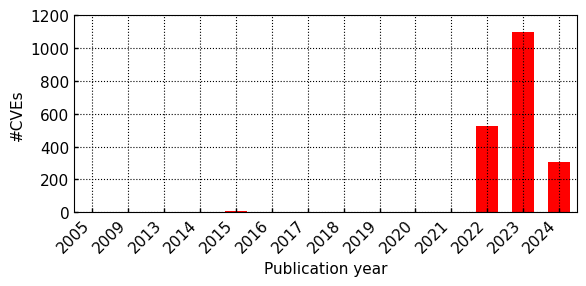

In [23]:
publish_years = df_cve_nvd[df_cve_nvd['id'].isin(missing_first)]['published'].astype(str).str.split('-').str[0]
publish_year_counts = publish_years.value_counts()
publish_year_dict = dict(sorted(publish_year_counts.to_dict().items()))
data = [(key, value) for key, value in publish_year_dict.items()]
fastplot.plot(data, None, mode='bars', xlabel='Publication year', ylabel='#CVEs', xticks_rotate=45, 
              figsize=(6, 3), grid=True)

## Comparison of cardinality status between NVD and FIRST datasets

In [56]:
vuln_status = list(df_cve_nvd['vulnStatus'].unique())
print('NVD')
for status in sorted(vuln_status):
    count = len(df_cve_nvd[df_cve_nvd['vulnStatus'] == status])
    print(f"{status.ljust(20)} {str(count).rjust(10)}")
print('\nFIRST')
df_first_in_nvd = df_cve_nvd[df_cve_nvd['id'].isin(cve_first)]
vuln_first_count = df_first_in_nvd['vulnStatus'].value_counts()
for status in sorted(vuln_status):
    print(f"{status.ljust(20)} {str(vuln_first_count[status]).rjust(10)}")
print(f"\n{len(cve_first) - len(df_first_in_nvd['id'].unique())} CVEs of FIRST not in NVD (probably only reserved)")

NVD
Analyzed                 130652
Awaiting Analysis          2521
Modified                  93779
Received                    170
Rejected                  13970
Undergoing Analysis          11

FIRST
Analyzed                 130651
Awaiting Analysis          2521
Modified                  93779
Received                     30
Rejected                  12151
Undergoing Analysis          11

49 CVEs of FIRST not in NVD (probably only reserved)


# CVEs added on 08/02/2024

## Cardinality of each vulnerability status

In [21]:
cve_first_before_increment = set(df_cve_first[df_cve_first['date'] == '2024-02-07']['cve'].unique())
cve_first_on_increment = set(df_cve_first[df_cve_first['date'] == '2024-02-08']['cve'].unique())
cve_first_added = list(cve_first_on_increment - cve_first_before_increment)
for status in sorted(vuln_status):
    count = df_cve_nvd[df_cve_nvd['id'].isin(cve_first_added) & (df_cve_nvd['vulnStatus'] == status)].shape[0]
    print(f"{status.ljust(20)} {str(count).rjust(10)}")

Analyzed                    712
Awaiting Analysis            25
Modified                     94
Received                      2
Rejected                  11152
Undergoing Analysis           0


## Distribution of publication year

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.9/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

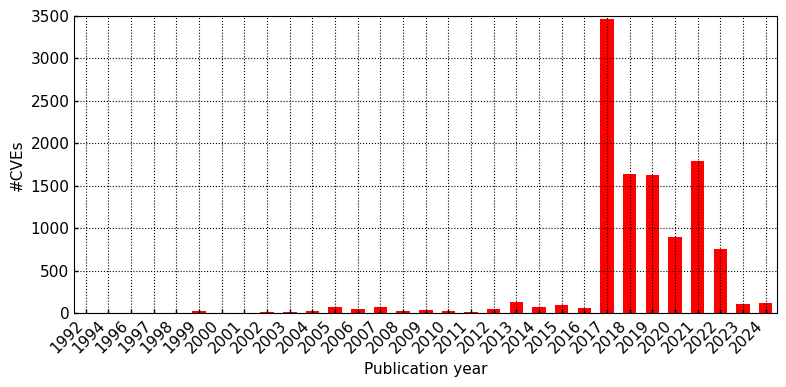

In [45]:
publish_years = df_cve_nvd[(df_cve_nvd['id'].isin(cve_first_added)) & (df_cve_nvd['vulnStatus'] != 'Analyzed')]['published'].astype(str).str.split('-').str[0]
publish_year_counts = publish_years.value_counts()
publish_year_dict = dict(sorted(publish_year_counts.to_dict().items()))
data = [(key, value) for key, value in publish_year_dict.items()]
fastplot.plot(data, None, mode='bars', xlabel='Publication year', ylabel='#CVEs', xticks_rotate=45, 
              figsize=(8, 4), grid=True)

In [52]:
publish_years = df_cve_nvd[(df_cve_nvd['id'].isin(cve_first_added)) & (df_cve_nvd['vulnStatus'] == 'Analyzed')]['published'].astype(str).str.split('-').str[0]
data = publish_years.value_counts()
print('Percentage of CVEs with status = Analyzed wrt year of pubblication\n')
for y, c in data.items():
    print(f"{y}\t {c / len(publish_years) * 100}%")

Percentage of CVEs with status = Analyzed wrt year of pubblication

2024	 100.0%
